# Query 3.1

 Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
 
- Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.

- Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.

(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [620]:
file = pd.read_csv('GOLD.csv')

In [621]:
df = pd.DataFrame(file)

In [622]:
print(set(df.Pred.isnull())); #Checking which column to perform first task
set(df.new.isnull())
df.fillna(0, inplace=True)

{False, True}


In [623]:
df.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,274.304688,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,278.360775,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,26.750000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,229.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,419.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [624]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [625]:
df = df.rename(columns={'Price': 'Close'})

In [626]:
x = df[['Open', 'Low', 'High', 'Close']]
y = df.Pred

## Exploratory Data Analysis

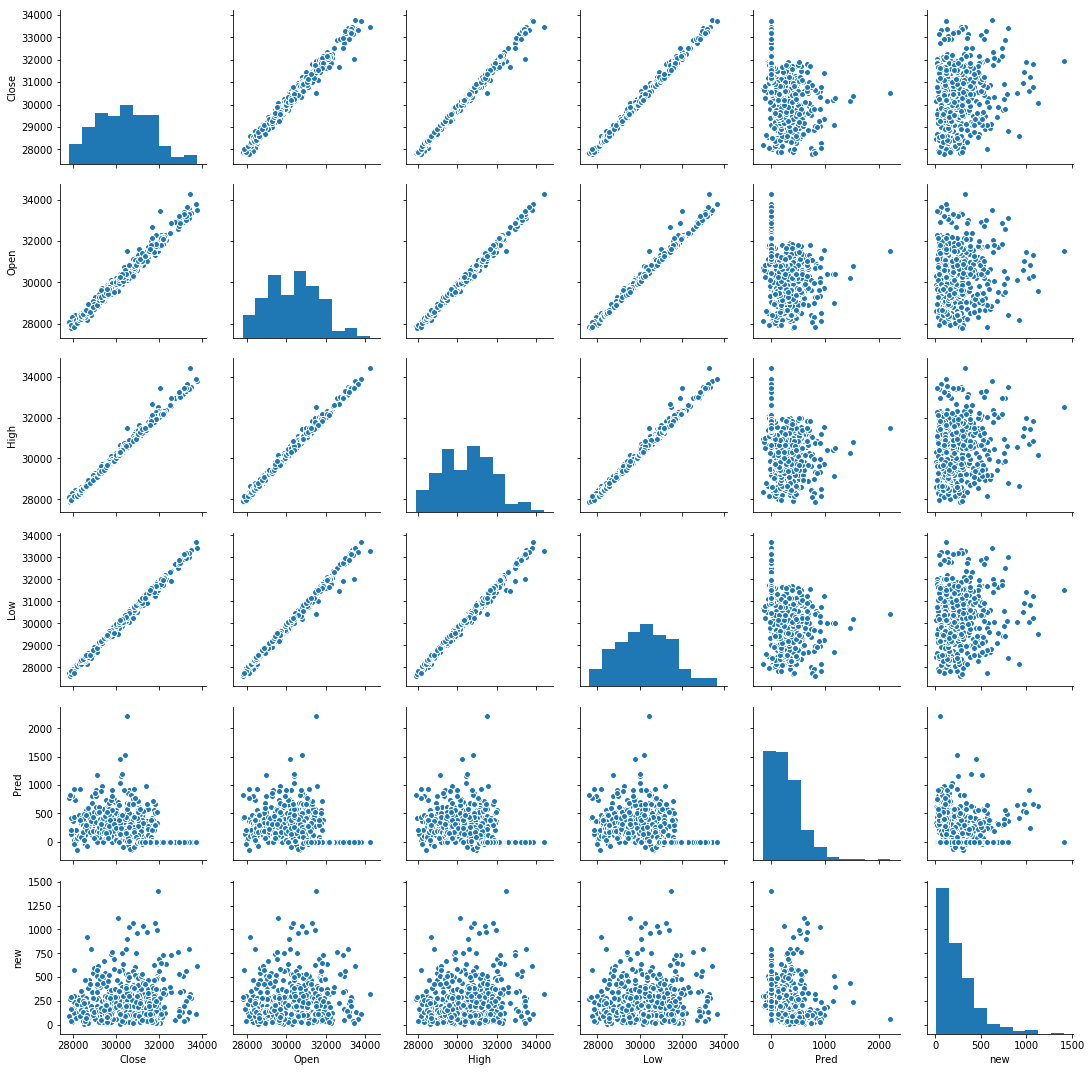

In [627]:
sns.pairplot(df)

From the given pair plot, we can infer that the distribution of data is highly skewed towards one direction, to gather more for the single variable,we'll go with the distplot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


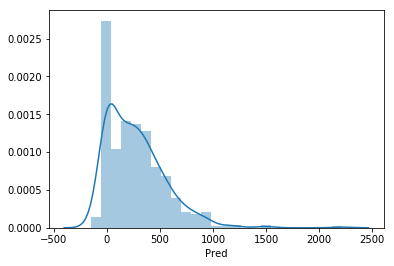

In [628]:
sns.distplot(df['Pred'])

Finding Correlation between the variables in the dataset from an index of -1 to 1. When the value is near 0, there is no linear relationship.

In [629]:
df.corr()

,Close,Open,High,Low,Pred,new
Close,1.000000,0.989758,0.995125,0.996830,-0.305541,0.164504
Open,0.989758,1.000000,0.995988,0.993992,-0.266662,0.058551
High,0.995125,0.995988,1.000000,0.994194,-0.283695,0.142109
Low,0.996830,0.993992,0.994194,1.000000,-0.321434,0.091895
Pred,-0.305541,-0.266662,-0.283695,-0.321434,1.000000,-0.039932
new,0.164504,0.058551,0.142109,0.091895,-0.039932,1.000000


#### Plotting Correlation using a heatmap

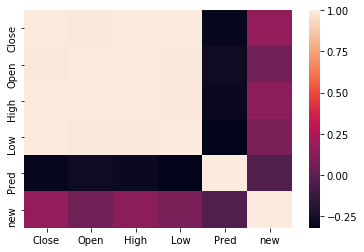

In [630]:
sns.heatmap(df.corr())

The Black colour represents that there is no linear relationshp, a lighter colour represents that the relationship between two variables is more linear

## Training and Testing Data

In [631]:
from sklearn.model_selection import train_test_split

In [632]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4
                                                    , random_state=42)

# 40% data goes to the test case and the rest remains in the training set. 


In [633]:
from sklearn.linear_model import LinearRegression

In [634]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [635]:
print(model.intercept_)

2433.607531653001


### Finding Coefficients

In [636]:
coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open,1.578732
Low,-2.127968
High,-1.021719
Close,1.495527


#### Testing Predictions

In [637]:
predictions = model.predict(x_test)

#### Visualizing Model Predictions

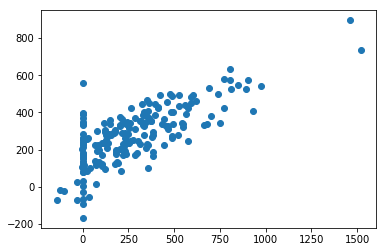

In [638]:
plt.scatter(y_test,predictions)

We find out that the outliers are minimal with the current random state and test-train split. This is the one to go with

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


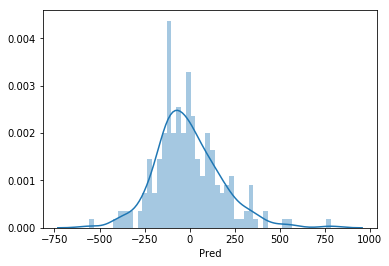

In [639]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics

In [640]:
from sklearn import metrics

In [641]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



Mean Absolute Error: 138.6094305839113
Mean Square Error: 33300.08854397948
Root Mean Square Error: 182.48311851779462


Since the Mean of Predictions is 274.5, the algorithm did a decent job, as it's less than 10% of the mean. 

In [642]:
#Incorporating the predictions index by testing on all of x and then 
#updating the value of predictions in the dataset

In [643]:
predictions = model.predict(x)
df['Pred'] = predictions

In [644]:
df.head()

,Date,Close,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,497.160335,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,133.915853,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,261.536362,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,407.142560,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,318.056855,112.153318


#### Conclusion for task 3.1.1


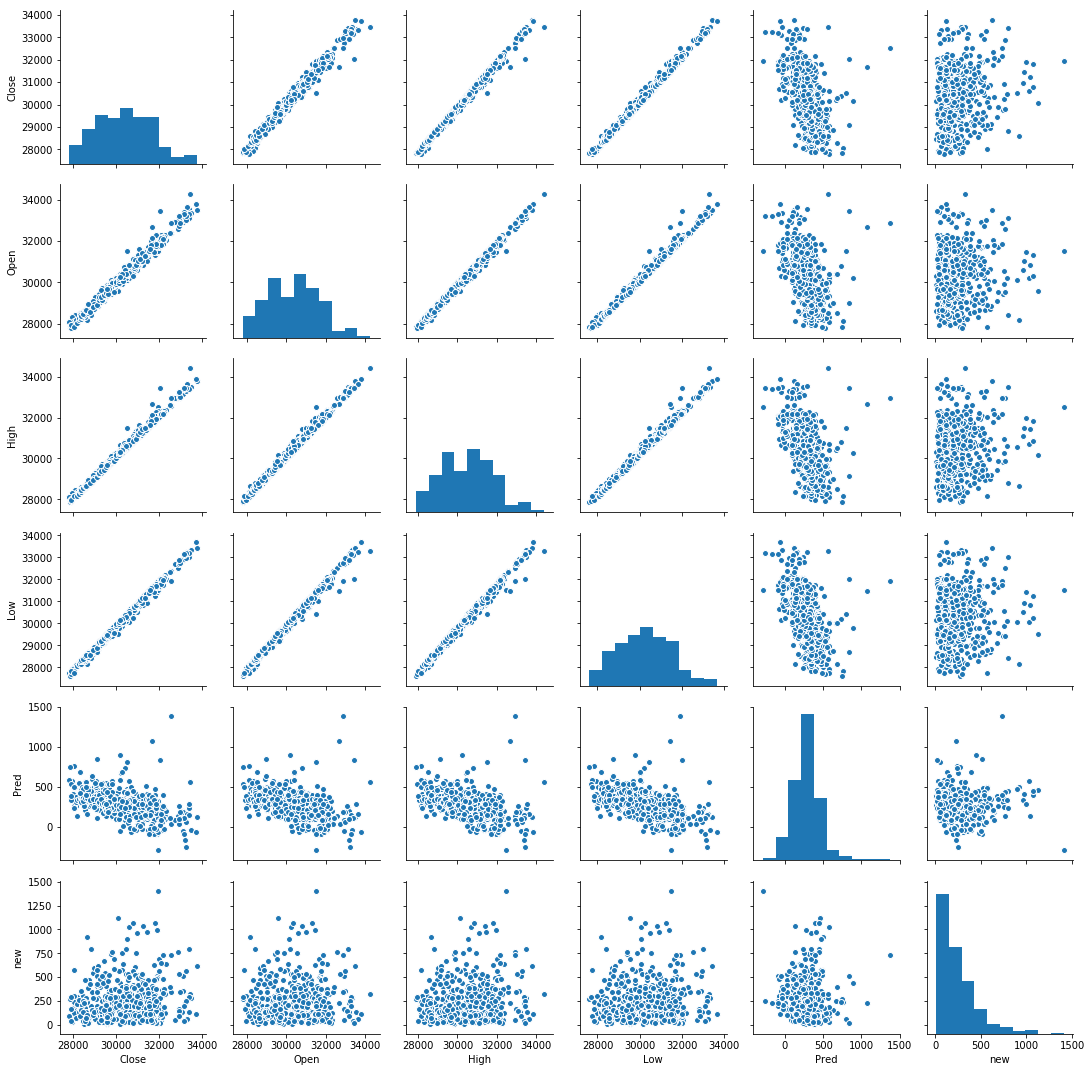

In [645]:
sns.pairplot(df)

From the given pairplot, we can see that the values are much more evenly spread out than the provided scenario

### 3.1.2 Finding the Polynomial Variable regression for 'new'

In [646]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [647]:
x = df[['Open', 'Low', 'High', 'Close']]
y = df.new

In [648]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4
                                                    , random_state=42)

# 40% data goes to the test case and the rest remains in the training set. 


In [649]:
poly = PolynomialFeatures(degree =3)
x_ = poly.fit_transform(x_train)
x_t = poly.fit_transform(x_test)

In [650]:
model = LinearRegression()


In [651]:
model.fit(x_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [652]:
y_preds = model.predict(x_t)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


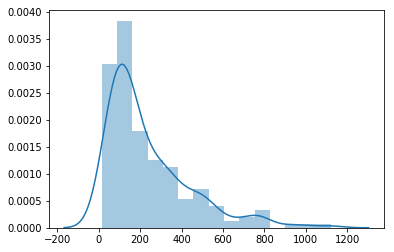

In [653]:
sns.distplot(y_preds)

In [654]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))



Mean Absolute Error: 0.07009059794925901
Mean Square Error: 0.10010980054031608
Root Mean Square Error: 0.31640132828468986


In [655]:
x = poly.fit_transform(x)

In [656]:
Pre = model.predict(x)
df.new = Pre

In [657]:
df.head()

,Date,Close,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,497.160335,117.016204
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,133.915853,295.439862
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,261.536362,132.169272
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,407.142560,101.217592
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,318.056855,112.191498


As the values of new nearly remains the same after the Polynomial Regression, it is feasible to conclude that the new column is based on Polynomial variables

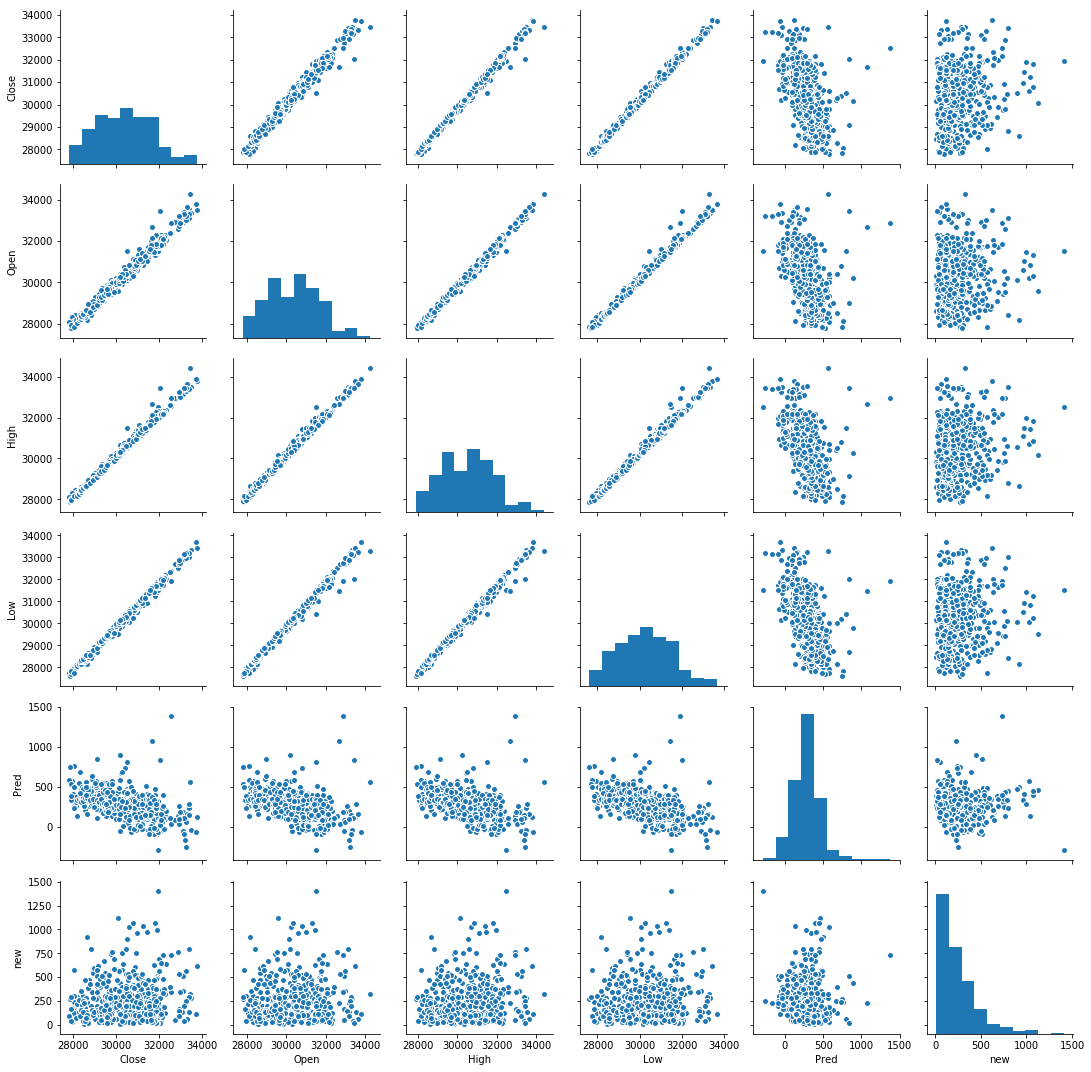

In [658]:
sns.pairplot(df)

Even now, from the pairplot, it can be noticed that based on the scatterings, the Pred is stacked closer to each other in many ways, describing this as a linear relation, whereas new still seems to be the same. 

Thus,

- Linear Model with 2 variables and varying coeff = Preds
- Polynomial Model = New

# Query 3.2

Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
- The daily Beta value for the past 3 months. (Daily= Daily returns)
- The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 

Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [659]:
file1 = pd.read_csv('Nifty50/Nifty50.csv')

In [660]:
file2 = pd.read_csv('Large_Cap/INFY.csv')

In [661]:
import statsmodels.api as sm

In [662]:
df1 = pd.DataFrame(file1)
df2 = pd.DataFrame(file2)

In [663]:
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d-%b-%Y')
df1.index = df1['Date']

df2['Date'] = pd.to_datetime(df2['Date'], format = '%d-%b-%Y')
df2.index = df2['Date']


### Daily Beta Value for Past 3 months

In [664]:
#Choosing the last 3 months
daily_nifty = df1['2019-02-13':]
daily_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,,
2019-02-13,2019-02-13,10870.55,10891.65,10772.10,10793.65,321958549,15360.98
2019-02-14,2019-02-14,10786.10,10792.70,10718.75,10746.05,627041405,20797.41
2019-02-15,2019-02-15,10780.25,10785.75,10620.40,10724.40,521876968,20733.95
2019-02-18,2019-02-18,10738.65,10759.90,10628.40,10640.95,345440240,14903.19
2019-02-19,2019-02-19,10636.70,10722.85,10585.65,10604.35,291507060,13765.01


In [665]:
daily_infy = df2['2019-02-13':]
daily_infy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2019-02-13,INFY,EQ,2019-02-13,750.45,750.10,759.70,743.65,754.00,754.90,753.01,5050182,3.802821e+09,133702,2418277,47.88
2019-02-14,INFY,EQ,2019-02-14,754.90,751.00,753.00,737.25,740.35,740.05,745.60,4610535,3.437611e+09,113149,2466085,53.49
2019-02-15,INFY,EQ,2019-02-15,740.05,742.30,746.50,732.60,742.05,741.95,739.44,5586389,4.130796e+09,93850,2900003,51.91
2019-02-18,INFY,EQ,2019-02-18,741.95,742.35,747.65,736.00,741.00,741.05,739.90,5346825,3.956112e+09,105532,3060004,57.23
2019-02-19,INFY,EQ,2019-02-19,741.05,739.10,740.55,721.30,724.00,724.30,726.70,9401334,6.831941e+09,124664,4041288,42.99


In [666]:
daily_prices = pd.concat([daily_nifty['Close'], daily_infy['Close Price']], axis = 1)
daily_prices.columns = ['NIFTY', 'INFY']

In [667]:
daily_prices.head()

,NIFTY,INFY
Date,,
2019-02-13,10793.65,754.90
2019-02-14,10746.05,740.05
2019-02-15,10724.40,741.95
2019-02-18,10640.95,741.05
2019-02-19,10604.35,724.30


In [668]:
daily_returns = daily_prices.pct_change(1)

In [669]:
#Dropping first missing row
clean_daily_returns = daily_returns.dropna(axis=0)

In [670]:
clean_daily_returns.head()

,NIFTY,INFY
Date,,
2019-02-14,-0.004410,-0.019671
2019-02-15,-0.002015,0.002567
2019-02-18,-0.007781,-0.001213
2019-02-19,-0.003440,-0.022603
2019-02-20,0.012363,0.022643


#### Making Oridnary Least Square Regression with Statsmodel

In [671]:
x = clean_daily_returns['NIFTY']
y = clean_daily_returns['INFY']

In [672]:
#Adding a constant to independent value
x1 = sm.add_constant(x)

In [673]:
model = sm.OLS(y, x1)

In [674]:
#Fitting model and printing results:

results = model.fit()

alpha = results.params[0]
beta = results.params[1]


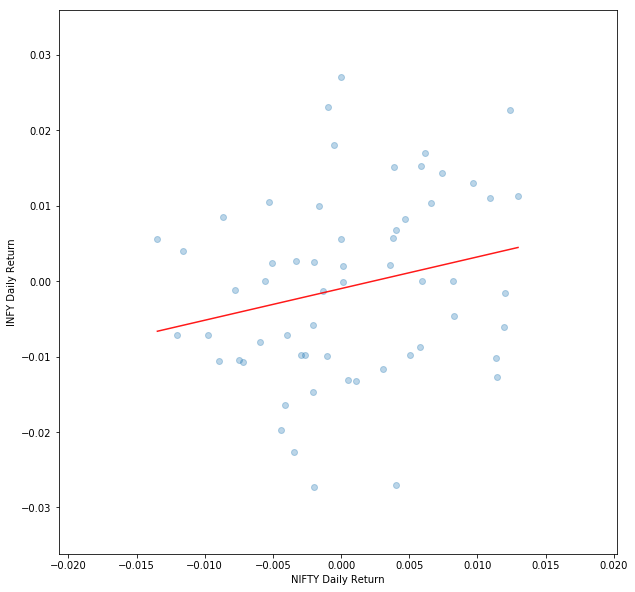

In [675]:
#Finding the regression plot

x2 = np.linspace(x.min(), x.max(), 100)
y_hat = x2* beta+alpha

plt.figure(figsize=(10,10))
plt.scatter(x, y, alpha = 0.3) #plotting row data
plt.xlabel("NIFTY Daily Return")
plt.ylabel("INFY Daily Return")

plt.plot(x2, y_hat, 'r', alpha = 0.9)

plt.show()


In [676]:
print("Beta Value: ", beta)

Beta Value:  0.4200302256300561


In [677]:
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.037     
Dependent Variable: INFY             AIC:                -351.5313 
Date:               2019-06-30 22:42 BIC:                -347.3763 
No. Observations:   59               Log-Likelihood:     177.77    
Df Model:           1                F-statistic:        3.231     
Df Residuals:       57               Prob (F-statistic): 0.0775    
R-squared:          0.054            Scale:              0.00014637
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const    -0.0010      0.0016    -0.6162    0.5402    -0.0041    0.0022
NIFTY     0.4200      0.2337     1.7976    0.0775    -0.0479    0.8879
-------------------------------------------------------------------
Omnibus:               0.122         Durbin-Watson:

### Monthly beta value

In [678]:
daily_prices = pd.concat([df1['Close'], df2['Close Price']], axis = 1)
daily_prices.columns = ['NIFTY', 'INFY']
daily_prices.head()

,NIFTY,INFY
Date,,
2017-05-15,9445.40,951.55
2017-05-16,9512.25,955.00
2017-05-17,9525.75,952.80
2017-05-18,9429.45,961.75
2017-05-19,9427.90,957.95


In [679]:
monthly_prices = daily_prices.groupby([daily_prices.index.to_period('M')]).sum()

In [680]:
monthly_prices.head()

,NIFTY,INFY
Date,,
2017-05,123481.25,12590.00
2017-06,201746.05,19935.55
2017-07,206852.50,20458.30
2017-08,207924.85,20001.60
2017-09,209536.25,18883.70


In [681]:
monthly_returns = monthly_prices.pct_change()

In [682]:
#Dropping first missing row
clean_monthly_returns = monthly_returns.dropna(axis=0)

In [683]:
clean_monthly_returns.head()

,NIFTY,INFY
Date,,
2017-06,0.633819,0.583443
2017-07,0.025311,0.026222
2017-08,0.005184,-0.022323
2017-09,0.007750,-0.055891
2017-10,-0.032275,-0.017377


#### Making Oridnary Least Square Regression with Statsmodel

In [684]:
x = clean_monthly_returns['NIFTY']
y = clean_monthly_returns['INFY']

In [685]:
x1 = sm.add_constant(x)

In [686]:
model = sm.OLS(y, x1)

In [687]:
results = model.fit()

alpha = results.params[0]
beta = results.params[1]


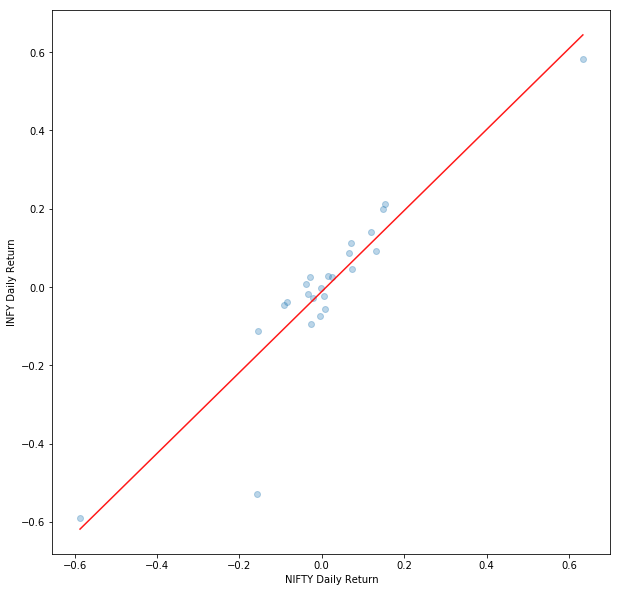

In [688]:
x2 = np.linspace(x.min(), x.max(), 100)
y_hat = x2* beta+alpha

plt.figure(figsize=(10,10))
plt.scatter(x, y, alpha = 0.3) #plotting row data
plt.xlabel("NIFTY Daily Return")
plt.ylabel("INFY Daily Return")

plt.plot(x2, y_hat, 'r', alpha = 0.9)

plt.show()

In [689]:
print("Beta Value: ", beta)

Beta Value:  1.0345704233666255


In [690]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.842    
Dependent Variable: INFY             AIC:                -46.3141 
Date:               2019-06-30 22:42 BIC:                -43.9580 
No. Observations:   24               Log-Likelihood:     25.157   
Df Model:           1                F-statistic:        123.5    
Df Residuals:       22               Prob (F-statistic): 1.71e-10 
R-squared:          0.849            Scale:              0.0078497
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0116     0.0181   -0.6400   0.5288   -0.0491   0.0260
NIFTY        1.0346     0.0931   11.1129   0.0000    0.8415   1.2276
------------------------------------------------------------------
Omnibus:              39.481       Durbin-Watson:          1.766  
Pro

# Inferences

### Beta Values: 
- Daily: 0.4200302256300561
- Monthly: 1.0345704233666255

#### Beta Inference: 

The logic of Beta values is: 
- Market has a value of 1.0
- If a stock has >1.0, it moves more than market, i.e, is more volatile.
- If <1.0, it moves less than the market, i.e, is less volatile
- if 0.0, it indicates no correlation with the chosen benchmark

High moving stocks are supposed to be riskier but provide a potential for higher returns, low beta stocks pose less risk, but also give lesser returns. 

Beta is a key component for CAPM. 

For the Daily prices, the INFY seems to move slower than NIFTY fluctuations in general, whereas, if taken in the longer run, it can be noticed that the opposite holds true. 

For negative betas, it provides an indication where there is an inverse relation to the market. It's possible but highly unlikely. It is the scenario where the stock goes up when the market goes down and vice versa.

#### Regression Inference:

From the regression inferences, it can be garnered that the dataset for the last three months for the NIFTY and INFY is comparatively less, paving the way for a wider, sparser graph for the liner relationship for the two, with numerous outliers, making the predictions innacurate. 

For the monthly database, it can be inferred that there is a significantly better relationship between the two databases, making it a better model for use. 

